In [37]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime

In [ ]:
import psutil
train_folder = [7554,7556,7557,7558]#,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
for j in train_folder:
    for i in range(3,20,8):
        url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
        data = pd.read_csv(url)
        #print(data.info())
        data.columns = data.columns.str.replace(' ', '')
        submit_time = data.iloc[-1][0]
        start_time = data.iloc[-2][0]
        data.dropna(inplace=True)
        data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
        data['X'] = data.X.astype(float)

        x = data.X.tolist()
        y = data.Y.tolist()

        fig=plt.figure(figsize=(5,3))
        ax=fig.add_subplot(111)

        plt.gca().invert_yaxis()
        ax.scatter(x,y,s=1,c='red')
        ax.set_xbound(lower=0.0, upper=1381)
        ax.set_ybound(lower=0.0, upper=925)

        plt.tight_layout()
        plt.show()

In [55]:
data = pd.read_csv(r'train/7554/SimpleTest/5.csv')

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          505 non-null    object 
 1    Y         503 non-null    float64
 2    Pressure  503 non-null    float64
 3    TiltX     503 non-null    float64
 4    TiltY     503 non-null    float64
 5    Time      503 non-null    object 
dtypes: float64(4), object(2)
memory usage: 23.8+ KB


In [57]:
print(data.columns)
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,608.351079801363,833.323017,0.107164,-3848.0,-644.0,00:02.7272871
1,608.877699503407,833.165031,0.107164,-3848.0,-644.0,00:02.7429109
2,608.877699503407,833.165031,0.099107,-3848.0,-644.0,00:02.7585749


In [58]:
data.columns = data.columns.str.replace(' ', '')

In [59]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

In [60]:
#data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
data['X'] = data.X.astype(float)
data['Time'] = data.Time.astype(str)
data = data.set_index(data['Time']).drop("Time", axis = 1)

In [61]:
#data = data.set_index(pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time).drop("Time", axis = 1)

In [62]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY
Time,,,,,
00:02.7272871,608.35108,833.323017,0.107164,-3848.0,-644.0
00:02.7429109,608.87770,833.165031,0.107164,-3848.0,-644.0
00:02.7585749,608.87770,833.165031,0.099107,-3848.0,-644.0


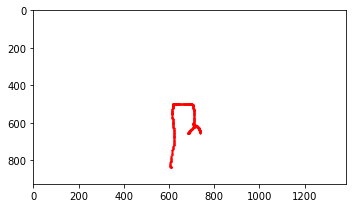

In [63]:
x = data.X.tolist()
y = data.Y.tolist()

fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

plt.gca().invert_yaxis()
ax.scatter(x,y,s=1,c='red')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)

plt.tight_layout()
plt.show()

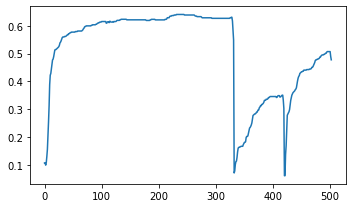

In [64]:
p = data.Pressure.tolist()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

ax.plot(p)

plt.tight_layout()
plt.show()

In [65]:
data.Pressure

Time
00:02.7272871    0.107164
00:02.7429109    0.107164
00:02.7585749    0.099107
00:02.7741475    0.107652
00:02.7898665    0.129381
                   ...   
00:16.4421005    0.507561
00:16.4578282    0.507561
00:16.4733589    0.507561
00:16.4891290    0.490227
00:16.5046050    0.478019
Name: Pressure, Length: 503, dtype: float64

In [109]:
hand_raising = 0
for i in range (len(x)-1):
    #if (x[i+1]-x[i] > 1 or y[i+1] -y[i] >1):
        if(p[i]-p[i+1] > data.Pressure.std()):
            hand_raising +=1
            print(i,i+1)
            print(p[i], p[i+1])
            print('x[i],y[i] :',x[i],',',y[i])
            print('x[i+1], y[i+1] : ',x[i+1],',',y[i+1])
    
print("There are " + str(hand_raising) + " hand raising in the drawing")  

331 332
0.549309551715851 0.0710307434201241
x[i],y[i] : 707.460907726065 , 608.825037533202
x[i+1], y[i+1] :  709.620048504446 , 611.879431805058
419 420
0.303456157445908 0.0610208287835121
x[i],y[i] : 738.636794087077 , 652.113177041229
x[i+1], y[i+1] :  712.990414597529 , 618.567502021019
There are 2 hand raising in the drawing


In [88]:
data.Pressure.std()
x[i+1]-x[i] > 10 or y[i+1] -y[i] >10 or 

0.15343056134237354

<IPython.core.display.Javascript object>


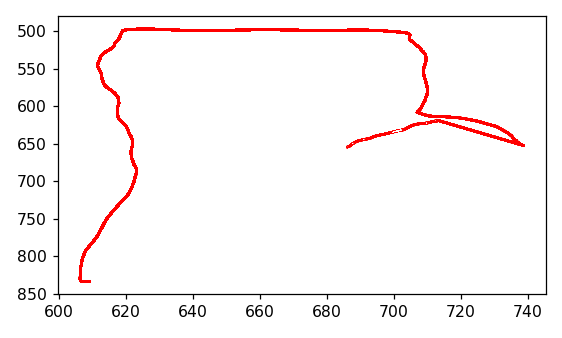

In [125]:
import psutil
%matplotlib notebook

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [126]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(x[i])
    d.append(y[i])
    if (p[i] - data.Pressure.median() > p[i-1]):
        print(p[i])
    
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()

In [121]:
data.Pressure.median()

0.600091576576233